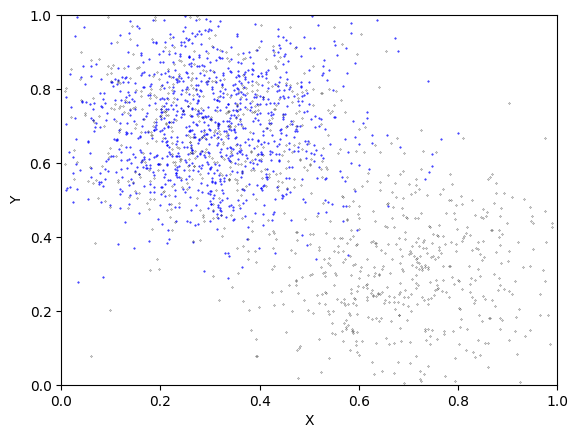

朴素贝叶斯分类器得分为 0.971
朴素贝叶斯分类器正确率为 0.9710000000000008


In [2]:
# 朴素贝叶斯分类器（抄来的）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 创建两类训练点
a1 = np.random.normal(loc=(0.3,0.7),size=(1000,2),scale=0.15)
a2 = np.random.normal(loc=(0.7,0.3),size=(1000,2),scale=0.15)
for i in range(0,1000):
  while a1[i][0]<0 or a1[i][0]>1 or a1[i][1]<0 or a1[i][1]>1:
    a1[i] = np.random.normal(loc=(0.3,0.7),size=(1,2),scale=0.15)
  while a2[i][0]<0 or a2[i][0]>1 or a2[i][1]<0 or a2[i][1]>1:
    a2[i] = np.random.normal(loc=(0.7,0.3),size=(1,2),scale=0.15)
# 创建测试点
real=np.random.uniform(low=0,high=1,size=1000) # real记录测试点的真实类别
a3 = np.zeros((1000,2))
for i in range(0,1000):
  if real[i] < 0.5:
    real[i] = 1
    a3[i] = np.random.normal(loc=(0.3,0.7),size=(1,2),scale=0.15)
    while a3[i][0]<0 or a3[i][0]>1 or a3[i][1]<0 or a3[i][1]>1:
      a3[i] = np.random.normal(loc=(0.3,0.7),size=(1,2),scale=0.15)
  else:
    real[i] = 2
    a3[i] = np.random.normal(loc=(0.7,0.3),size=(1,2),scale=0.15)
    while a3[i][0]<0 or a3[i][0]>1 or a3[i][1]<0 or a3[i][1]>1:
      a3[i] = np.random.normal(loc=(0.7,0.3),size=(1,2),scale=0.15)

# 绘制散点图
plt.xlim(0, 1)
plt.xlabel("X")
plt.ylim(0, 1)
plt.ylabel("Y")
plt.scatter(x=a1[:,0],y=a1[:,1],s=0.2,label='第一类点',c='b',marker='o')
plt.scatter(x=a2[:,0],y=a2[:,1],s=0.2,label='第二类点',c='g',marker='+')
plt.scatter(x=a3[:,0],y=a3[:,1],s=0.2,label='测试点',c='black',marker='.')
plt.show()

# 划分20×20个网格，使用网格作为训练集
train_data_X = []
train_data_y = []
for i in range(0,1000):
  for j in range(1,21):
    for k in range(1,21):
      if a1[i][0] >= (j-1)*0.05 and a1[i][0] < j*0.05 and a1[i][1] >= (k-1)*0.05 and a1[i][1] < k*0.05:
        train_data_X.append([j,k])
        train_data_y.append(1)
      if a2[i][0] >= (j-1)*0.05 and a2[i][0] < j*0.05 and a2[i][1] >= (k-1)*0.05 and a2[i][1] < k*0.05:
        train_data_X.append([j,k])
        train_data_y.append(2)
train_data_X = np.array(train_data_X)
train_data_y = np.array(train_data_y)
# 训练朴素贝叶斯分类器
from sklearn.naive_bayes import GaussianNB
ber = GaussianNB()
ber.fit(train_data_X,train_data_y)
# 使用朴素贝叶斯分类器预测
pred = []
test_data_X = []
for i in range(0,1000):
  for j in range(1,21):
    for k in range(1,21):
      if a3[i][0] >= (j-1)*0.05 and a3[i][0] < j*0.05 and a3[i][1] >= (k-1)*0.05 and a3[i][1] < k*0.05:
        test_data_X.append([j,k])
        pred.append(float(ber.predict([[j,k]])))
test_data_X = np.array(test_data_X)
pred = np.array(pred)
# 朴素贝叶斯分类器得分及正确率
print('朴素贝叶斯分类器得分为',ber.score(test_data_X,real))
# 输出结果：朴素贝叶斯分类器得分为 0.957
accuracy = 0
for i in range(0,1000):
  if pred[i]==real[i]:
    accuracy = accuracy + 0.001
print('朴素贝叶斯分类器正确率为',accuracy)

In [49]:
# 贝叶斯网络（自己做的）

import numpy as np
# 模拟符合贝叶斯条件概率网的数据 
data = np.full((5000,4),0) # 初始化产生5000行4列的零元素矩阵
for i in range(5000):
    flag1 = np.random.uniform(size=1) # 阳光
    if flag1<=0.7:
        data[i][0] = 1 

    flag2 = np.random.uniform(size=1) # 风
    if flag2<=0.9:
        data[i][1] = 1 

    flag3 = np.random.uniform(size=1) # 衣服干没干
    if data[i][0]==1 and data[i][1]==1:
        if flag3<=0.8:
            data[i][2]=1
    elif data[i][0]==0 and data[i][1]==1:
        if flag3<=0.7:
            data[i][2]=1
    elif data[i][0]==1 and data[i][1]==0:
        if flag3<=0.6:
            data[i][2]=1       
    elif data[i][0]==0 and data[i][1]==0:
        if flag3<=0.3:
            data[i][2]=1
    
    flag4 = np.random.uniform(size=1) # 穿衣服
    if data[i][2]==1 and flag4<=0.7:
        data[i][3]=1
    elif data[i][2]==0 and flag4<=0.2:
        data[i][3]=1

# 近似求解衣服穿衣服前提下，出太阳的概率
count = 0 
for i in range(5000):
    if data[i][3]==1 and data[i][0]==1:
        count = count+1
print(count/5000)

0.428
